In [44]:
%matplotlib inline

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from functional import seq

In [6]:
df = pd.read_sql('questions', 'sqlite:///../data/internal/non_naqt.db')
df = df[df.page != '']

In [33]:
df.shape

(36448, 9)

In [21]:
df

,id,category,page,answer,tournament,type,naqt,fold,gender
0,1,Fine_Arts,Thomas Cole,thomas cole,1999 ACF Regionals,people,-1,train,male
1,2,Fine_Arts,Jean-Honore Fragonard,jeanhonore fragonard,1999 ACF Regionals,people,-1,dev,male
2,3,Fine_Arts,Holy Trinity (Masaccio),holy trinity,1999 ACF Regionals,work,-1,train,non_person
3,4,Fine_Arts,Rococo,rococo,1999 ACF Regionals,work,-1,dev,non_person
4,5,Fine_Arts,The Swing (painting),swing,1999 ACF Regionals,work,-1,train,non_person
5,6,Fine_Arts,El Greco,el greco,1999 ACF Regionals,people,-1,dev,male
6,7,Fine_Arts,Aubrey Beardsley,aubrey beardsley,1999 ACF Regionals,people,-1,train,male
7,8,Fine_Arts,Augustus Saint-Gaudens,augustus saintgaudens,1999 ACF Regionals,people,-1,dev,male
8,9,Fine_Arts,David (Michelangelo),david,1999 ACF Regionals,work,-1,train,non_person
10,11,Fine_Arts,The Garden of Earthly Delights,garden of earthly delights,1999 ACF Regionals,work,-1,train,non_person


In [31]:
print("Number of questions in train:", len(df[df.fold == 'train']))
print("Number of questions in dev:", len(df[df.fold == 'dev']))
print("Number of questions in test:", len(df[df.fold == 'test']))

Number of questions in train: 16276
Number of questions in dev: 16298
Number of questions in test: 3874


In [8]:
print("Total Number of Unique Answers:", len(df['page'].unique()))

Total Number of Unique Answers: 11895


In [9]:
d = {}
folds = ['train', 'dev', 'test']
for fold in folds:
    d[fold] = set(df[df.fold == fold]['page'].unique())

In [10]:
for fold in folds:
    print("Number of Unique Answers in", fold, len(d[fold]))

Number of Unique Answers in train 8062
Number of Unique Answers in dev 8023
Number of Unique Answers in test 2632


In [11]:
print("Answer common between train and test", len(d['train'].intersection(d['test'])))
print("Answer common between train and dev", len(d['train'].intersection(d['dev'])))
print("Answer common between dev and test", len(d['train'].intersection(d['test'])))
print("Answer common between train + dev and test", len((d['train'].union(d['dev'])).intersection(d['test'])))

Answer common between train and test 1980
Answer common between train and dev 4527
Answer common between dev and test 1980
Answer common between train + dev and test 2295


In [19]:
# Most common answers
df.groupby('page').count().sort_values(by='id', ascending=False)

,id,category,answer,tournament,type,naqt,fold,gender
page,,,,,,,,
Japan,37,37,37,37,37,37,37,37
Robert Frost,33,33,33,33,33,33,33,33
Jorge Luis Borges,31,31,31,31,31,31,31,31
Australia,31,31,31,31,31,31,31,31
Entropy,30,30,30,30,30,30,30,30
Poland,29,29,29,29,29,29,29,29
Mexico,29,29,29,29,29,29,29,29
Portugal,28,28,28,28,28,28,28,28
Spain,28,28,28,28,28,28,28,28


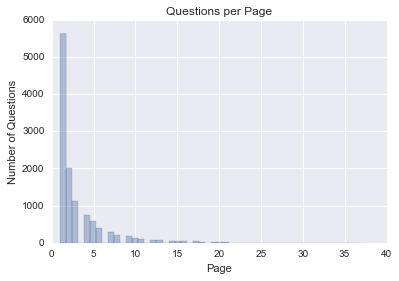

In [20]:
# How many questions per answer
g = sb.distplot(df.groupby('page').count()['id'], kde=False, )
g.set_ylabel('Number of Questions')
g.set_xlabel('Page')
g.set_title('Questions per Page')

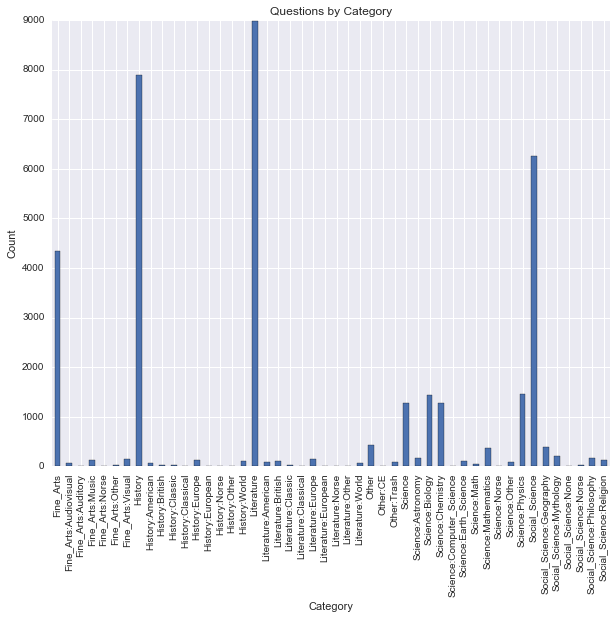

In [18]:
g = df.groupby('category').count().plot.bar(figsize=(10, 8), y='id', legend=False, title='Questions by Category')
g.set_ylabel('Count')
g.set_xlabel('Category')

In [36]:
# How many questions are left after different thresholding on number of questions per answer
def threshold_stats(n):
    answer_questions = seq(df[['id', 'page']])\
        .group_by(lambda kv: kv[1])\
        .filter(lambda kv: len(kv[1]) > n)
    return answer_questions.len(), answer_questions.map(lambda kv: kv[1]).flatten().len()

In [27]:
# How many answers are there now  compared to 12000 to start
answer_questions.len()

2374

In [30]:
# Number of questions after filtering compared to 36448 to start
answer_questions.map(lambda kv: kv[1]).flatten().len()

20407

In [41]:
data = []
for i in range(10):
    answers, questions = threshold_stats(i)
    data.append({'n': i, 'count': answers, 'type': 'answers'})
    data.append({'n': i, 'count': questions, 'type': 'questions'})
data = pd.DataFrame(data)

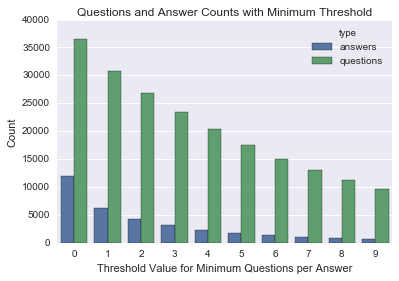

In [56]:
g = sb.barplot(x='n', y='count', hue='type', data=data)
g.set_title('Questions and Answer Counts with Minimum Threshold')
g.set_xlabel('Threshold Value for Minimum Questions per Answer')
g.set_ylabel('Count')
fig = g.get_figure()
fig.savefig('min_treshold.png', format='png', dpi=300)